In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('community_responsiveness_records_full.csv')
df.describe()

,number,comments
count,221308.00000,221308.000000
mean,9075.00962,3.013185
std,14793.87026,6.372788
min,1.00000,0.000000
25%,531.00000,0.000000
50%,1997.00000,1.000000
75%,10880.00000,4.000000
max,101013.00000,663.000000


In [47]:
df.groupby('ecosystem').describe()

number                                                            
             count          mean           std  min    25%     50%      75%   
ecosystem                                                                     
maven      62711.0   3998.209373   9036.445370  1.0  362.0  1169.0   3251.0  \
npm        61341.0  11424.352847  17903.690683  1.0  675.0  2779.0  14555.0   
pypi       68751.0  12462.054312  14830.024144  1.0  708.0  3429.0  32107.0   
rubygems   28505.0   7019.140396  14101.296560  1.0  467.0  1568.0   2923.0   

                    comments                                                 
                max    count      mean       std  min  25%  50%  75%    max  
ecosystem                                                                    
maven      101013.0  62711.0  2.663265  5.451633  0.0  0.0  1.0  3.0  405.0  
npm         67071.0  61341.0  3.427218  8.431981  0.0  0.0  2.0  4.0  663.0  
pypi        81988.0  68751.0  2.781560  5.390264  0.0  0.0  1.0  3.0  236.0  
rubygems    49667.0  28505.0  3.450693  5.088395  0.0  0.0  2.0  5.0  209.0

In [48]:
filtered_data = df[df['openByOutsider'] == True]
filtered_data.groupby('ecosystem').describe()

number                                                            
             count         mean           std  min    25%     50%       75%   
ecosystem                                                                     
maven      44786.0  2794.981066   5836.756523  1.0  324.0   964.0   2696.00  \
npm        46664.0  9626.428296  16536.185013  1.0  569.0  2131.5  13119.25   
pypi       38390.0  7996.323079  12793.816234  1.0  465.0  1690.0   8477.50   
rubygems   20435.0  4364.081771  10184.477651  1.0  393.0  1149.0   2823.00   

                    comments                                                 
                max    count      mean       std  min  25%  50%  75%    max  
ecosystem                                                                    
maven      101010.0  44786.0  2.694972  5.510525  0.0  0.0  1.0  3.0  405.0  
npm         67071.0  46664.0  3.286645  7.783276  0.0  0.0  1.0  4.0  259.0  
pypi        81985.0  38390.0  2.946054  4.469413  0.0  1.0  2.0  4.0  132.0  
rubygems    49657.0  20435.0  3.791241  5.191580  0.0  1.0  2.0  6.0  209.0

Percentage of issues with insider comments in maven: 43.46%
Percentage of issues with insider comments in npm: 43.13%
Percentage of issues with insider comments in pypi: 56.47%
Percentage of issues with insider comments in rubygems: 57.55%


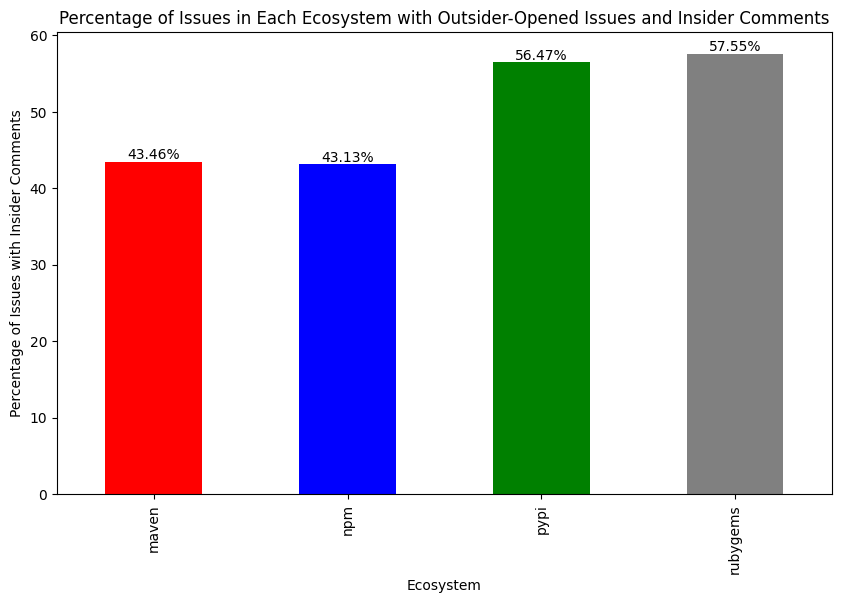

In [49]:
filtered_data = df[df['openByOutsider'] == True]
grouped_data = filtered_data.groupby('ecosystem')
percentage_insider_comments_by_ecosystem = (grouped_data['returnByInsider'].sum() / grouped_data['returnByInsider'].count()) * 100

for ecosystem, percentage in percentage_insider_comments_by_ecosystem.items():
    print(f"Percentage of issues with insider comments in {ecosystem}: {percentage:.2f}%")

plt.figure(figsize=(10, 6))
bar_plot = percentage_insider_comments_by_ecosystem.plot(kind='bar', color=['red', 'blue', 'green', 'gray'])
plt.title('Percentage of Issues in Each Ecosystem with Outsider-Opened Issues and Insider Comments')
plt.xlabel('Ecosystem')
plt.ylabel('Percentage of Issues with Insider Comments')

# Annotating the bars with the percentage values
for index, value in enumerate(percentage_insider_comments_by_ecosystem):
    plt.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.show()

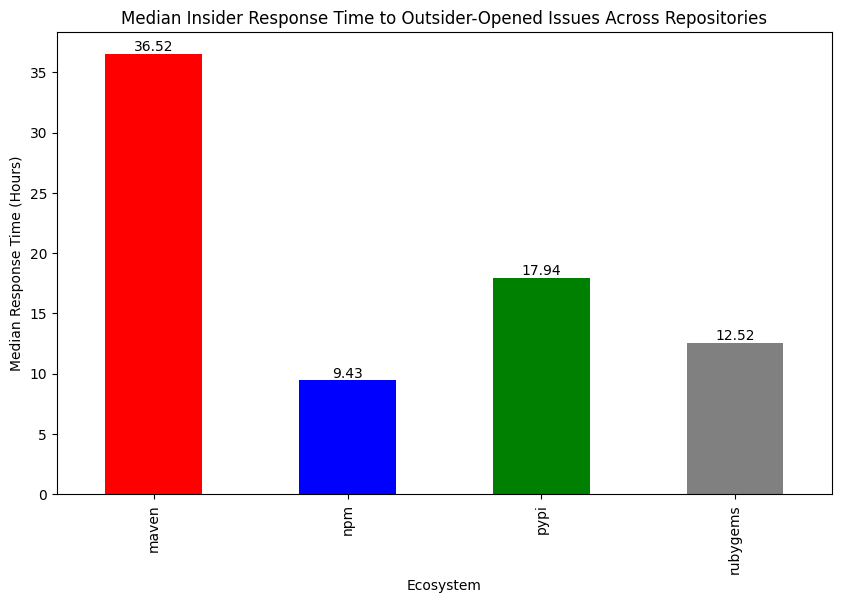

In [50]:
def calculate_average_time_to_response(group):
    group['created_at'] = pd.to_datetime(group['created_at'])
    group['reply_at'] = pd.to_datetime(group['reply_at'])
    return (group['reply_at'] - group['created_at']).median()

average_time_to_response_by_ecosystem = grouped_data.apply(calculate_average_time_to_response)

average_time_to_response_by_ecosystem_hours = average_time_to_response_by_ecosystem / pd.Timedelta(hours=1)

colors = ['red', 'blue', 'green', 'gray']

plt.figure(figsize=(10, 6))
ax = average_time_to_response_by_ecosystem_hours.plot(kind='bar', color=colors, label='Average Time-to-Response (Hours)')
plt.title('Median Insider Response Time to Outsider-Opened Issues Across Repositories')
plt.xlabel('Ecosystem')
plt.ylabel('Median Response Time (Hours)')

for index, value in enumerate(average_time_to_response_by_ecosystem_hours):
    ax.text(index, value, f"{value:.2f}", ha='center', va='bottom')

plt.show()